# Task 1 Applying Classification algorithm and compare which one is best

## Importing required pacakages 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## EDA Process

### Data Collection

In [3]:
df=pd.read_csv("Loan_Approval.csv")

### Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
df.head(30)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [7]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [11]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### Data cleaning 

### There is no missing values in the dataset after the data understanding process so we can continue next step

### Data Transformation

In [12]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [16]:
df['person_age']=df['person_age'].astype('int')
df['person_income'] = df['person_income'].astype('int')
df['loan_amnt'] = df['loan_amnt'].astype('int')
df['person_gender'] = df['person_gender'].replace('female', 0)
df['person_gender'] = df['person_gender'].replace('male', 1)

In [17]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,0,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,0,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,0,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,1,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37,0,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33,1,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29,1,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6.0,604,No,1


In [279]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

### Visualization

<Axes: xlabel='person_age', ylabel='Count'>

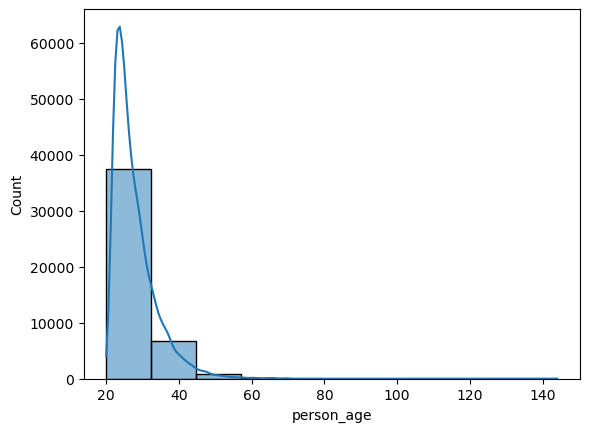

In [280]:
sns.histplot(df['person_age'],bins=10,kde=True)

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_gender'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_exp'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'loan_status'}>, <Axes: >, <Axes: >]],
      dtype=object)

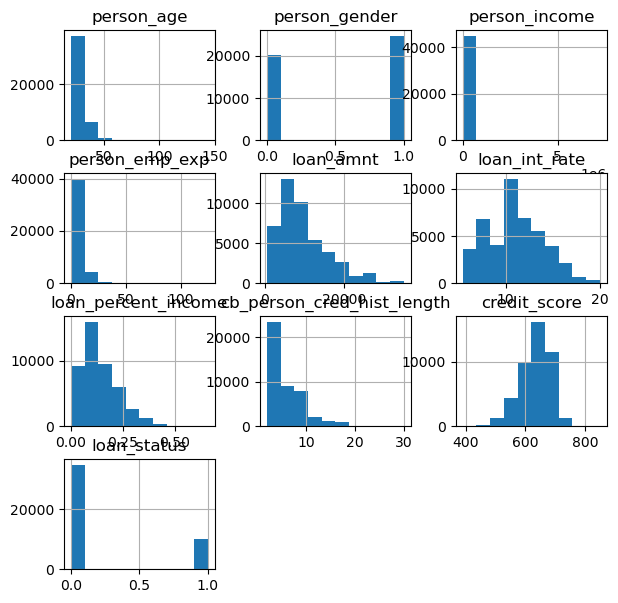

In [281]:
df.hist(figsize=(7,7))

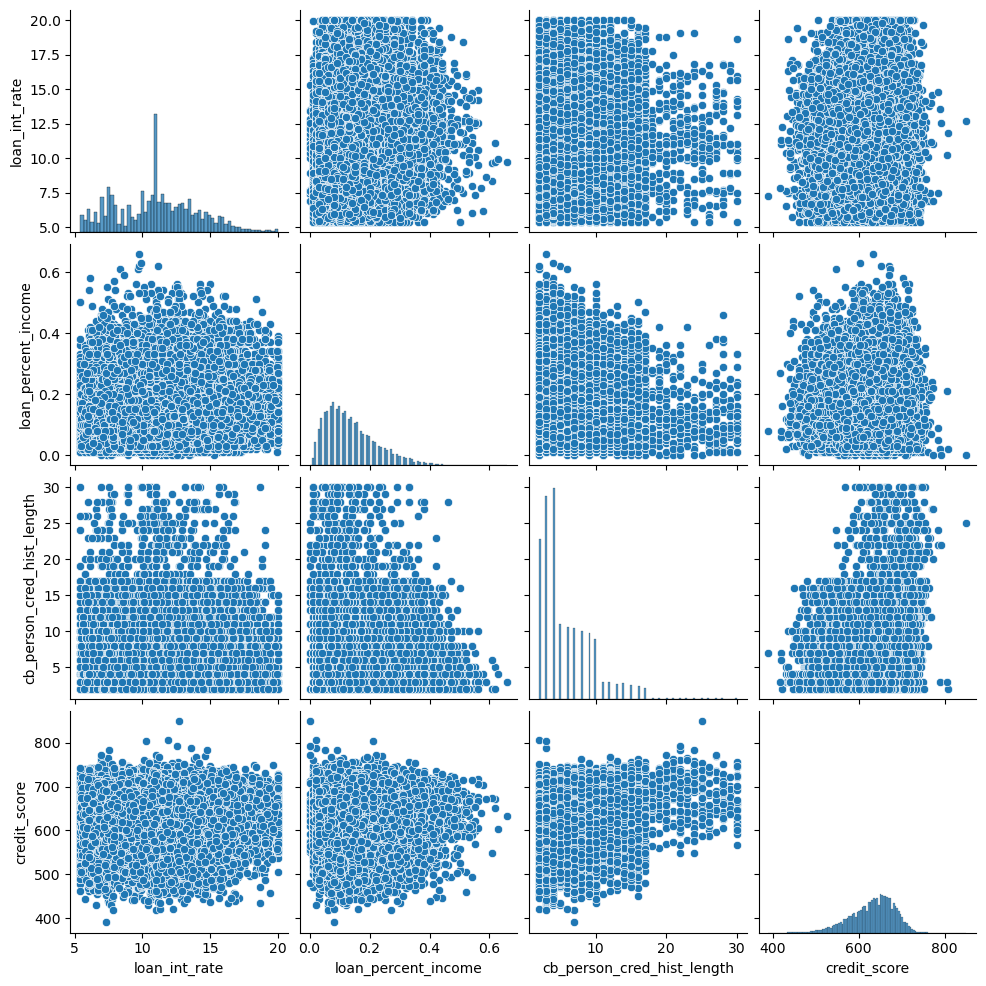

In [282]:
sns.pairplot(df[['loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']])

<Axes: >

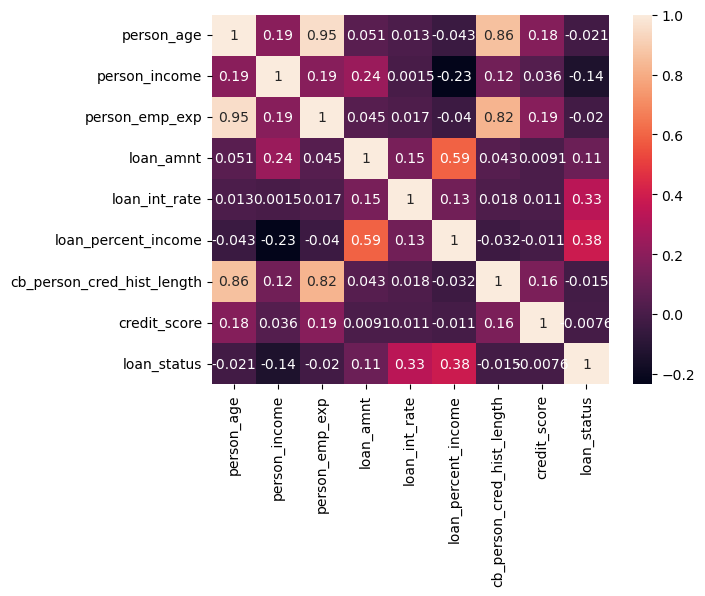

In [283]:
sns.heatmap(df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']].corr(),annot=True)

### Split datasets & apply data imputation and feature scaling

In [296]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [18]:
# feature selection
X=df[['loan_int_rate','loan_percent_income','person_age','cb_person_cred_hist_length']]
y=df[['loan_status']]

In [19]:
X.isnull().sum()

loan_int_rate                 0
loan_percent_income           0
person_age                    0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
y.isnull().sum()

loan_status    0
dtype: int64

## Finding oversampling or undersampling

Class Distribution: Counter({0: 35000, 1: 10000})
Minority Class Ratio: 22.22 %


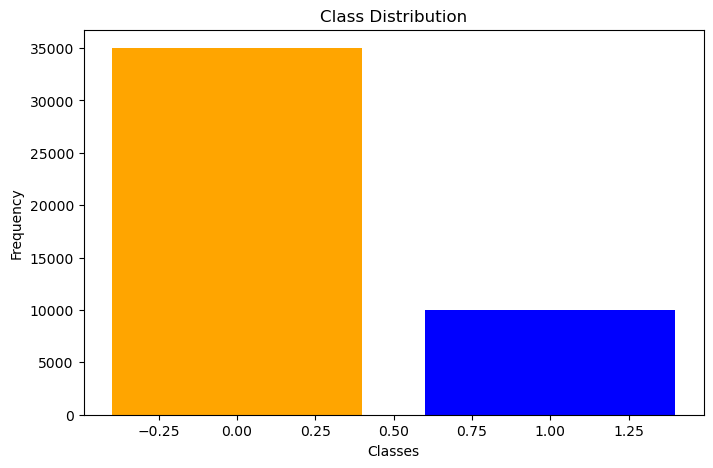

Recommendation: Both oversampling and undersampling may work, but oversampling is generally safer.


In [48]:
from collections import Counter


target_column = 'loan_status'  

# Checking class distribution
class_counts = Counter(df[target_column])
total_samples = sum(class_counts.values())
minority_ratio = min(class_counts.values()) / total_samples

print("Class Distribution:", class_counts)
print("Minority Class Ratio:", round(minority_ratio * 100, 2), "%")

# Ploting class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

# Decision based on class ratio
if minority_ratio < 0.1:
    print("Recommendation: The minority class is less than 10% of the total. Oversampling (SMOTE) is recommended.")
elif 0.1 <= minority_ratio < 0.4:
    print("Recommendation: Both oversampling and undersampling may work, but oversampling is generally safer.")
else:
    print("Recommendation: The classes are closer to balanced. Undersampling may be sufficient.")


In [22]:
# importing train_test_split package
from sklearn.model_selection import train_test_split

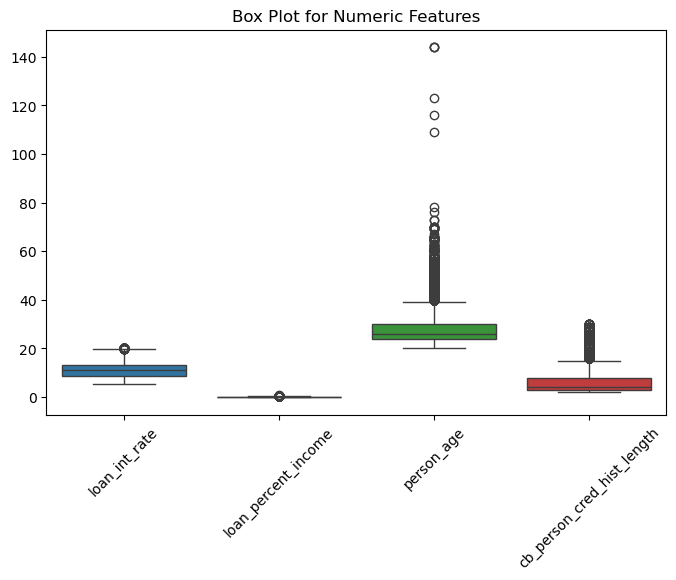

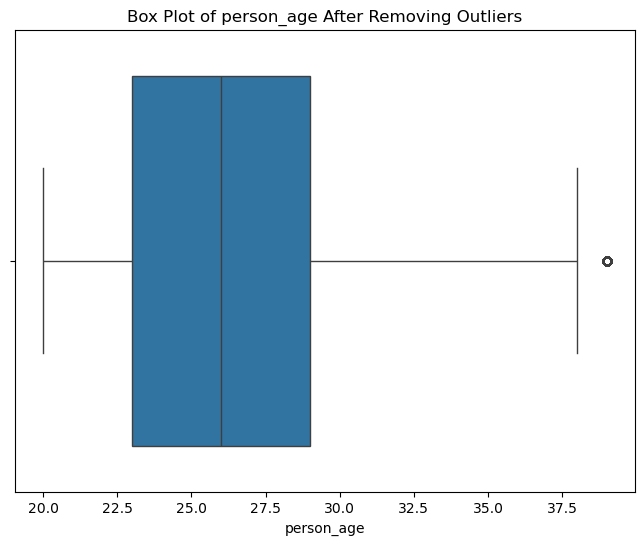

In [83]:
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Box plot for all numeric columns in the training set
plt.figure(figsize=(8, 5))
sns.boxplot(data=X_train.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Box Plot for Numeric Features")
plt.show()


# Step 1: Removing outliers only for `person_age` feature using IQR
feature = 'person_age'  # Replace with the actual name of the age-related feature in your dataset
Q1 = X_train[feature].quantile(0.25)
Q3 = X_train[feature].quantile(0.75)
IQR = Q3 - Q1

# Calculating bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing rows with outliers in `person_age`
X_train_no_outliers = X_train[(X_train[feature] >= lower_bound) & (X_train[feature] <= upper_bound)]

# Aligning y_train with X_train_no_outliers
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]


# Box plot for `person_age` after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=X_train_no_outliers['person_age'])
plt.title("Box Plot of person_age After Removing Outliers")
plt.show()



from imblearn.over_sampling import SMOTE
# Apply SMOTE on the training data only
smote = SMOTE(random_state=42, sampling_strategy='auto')  
X_train_smote, y_train_smote = smote.fit_resample(X_train_no_outliers, y_train_no_outliers)


In [85]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train_smote)
X_test_scaled=sc.transform(X_test)


## Applying KNN Algorithm

In [52]:
# applying KNN
from sklearn.neighbors import KNeighborsClassifier

In [87]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': range(1, 21),  # Testing k values from 1 to 20
    'weights': ['uniform', 'distance'],  # Different weighting strategies
    'metric': ['euclidean', 'manhattan']  # Common distance metrics
}

# Initializing GridSearchCV with KNN and parameter grid
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy', 
    n_jobs=-1  
)

# Fiting GridSearch to the training data
grid_search.fit(X_train_scaled, y_train_smote)

# Printing the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Score: 0.8092112140055979


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [89]:
# Applying KNN model
knn_model=KNeighborsClassifier(n_neighbors=16,metric='manhattan',weights='distance')
knn_model.fit(X_train_scaled,y_train_smote)


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

## Changing to dataframe ,predict on test data, confusion matrix

In [65]:
# importing metrics package
from sklearn import metrics

In [88]:
# Predicting on test data
y_pred_knn=knn_model.predict(X_test_scaled)

# channging KNN classification report to dataframe
knn_report=metrics.classification_report(y_test,y_pred_knn,output_dict=True)
knn_report_df = pd.DataFrame(knn_report).transpose()


# Confusion Matrix
knn_conf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)

## Applying SVM Algorithm

In [94]:
from sklearn.svm import SVC

In [95]:
# Initializing and training SVM model
svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train_scaled, y_train_smote)
# Predicting on test data
y_pred_svm = svm_model.predict(X_test_scaled)

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Changing to dataframe ,predict on test data, confusion matrix

In [69]:
from sklearn import metrics

In [70]:
# changing svm report to dataframe
svm_report=metrics.classification_report(y_test,y_pred_svm,output_dict=True)
svm_report_df = pd.DataFrame(svm_report).transpose()

# Confusion Matrix
svm_conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

In [71]:
print('Accuracy for SVM',metrics.accuracy_score(y_test,y_pred_svm))

Accuracy for SVM 0.7401111111111112


## Comparing both Algorithm

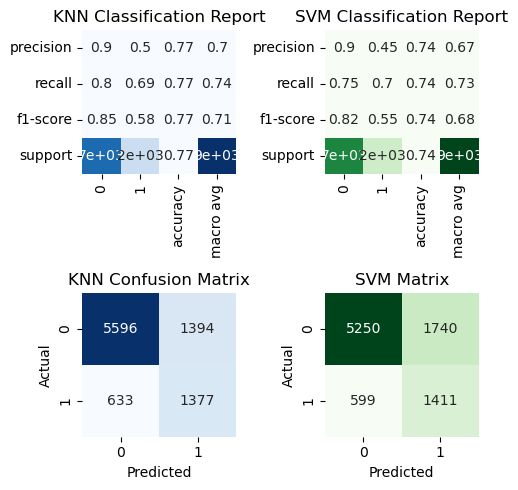

In [96]:
fig, axes = plt.subplots(2,2, figsize=(5, 5))

# Classification Report Heatmaps
sns.heatmap(knn_report_df.iloc[:-1, :].T, annot=True, cmap="Blues", cbar=False, ax=axes[0,0])
axes[0,0].set_title("KNN Classification Report")

sns.heatmap(svm_report_df.iloc[:-1, :].T, annot=True, cmap="Greens", cbar=False, ax=axes[0,1])
axes[0,1].set_title("SVM Classification Report")


# Confusion Matrix Heatmaps
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("KNN Confusion Matrix")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap="Greens", cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("SVM Matrix")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Displaying the plots
plt.tight_layout()
plt.show()

In [73]:

print('Accuracy for KNN',metrics.accuracy_score(y_test,y_pred_knn))
print('Accuracy for SVM',metrics.accuracy_score(y_test,y_pred_svm))



Accuracy for KNN 0.7747777777777778
Accuracy for SVM 0.7401111111111112
